In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from modules.prepare_data_by_model import marge_and_split_by_model
import matplotlib.pyplot as plt
from modules.database import commit_req
import mysql.connector as mysql

In [2]:
basic_torvet = pd.read_csv("./data/torvet_Benzin.csv", sep=";")
basic_basen = pd.read_csv("./data/Benzin.csv", sep=";")
models = marge_and_split_by_model(basic_torvet,basic_basen, np)

models

{'100':   model  price      km  year capacity
 0   100  44900  138000  1978      1.6
 1   100  39000  168000  1973      1.8
 2   100  19900  296000  1992      2.6
 3   100  34900  222000  1992      2.8,
 '80':   model  price      km  year capacity
 0    80  39980  177000  1989      1.8
 1    80  69800  125000  1974      1.5
 2    80  28000  183000  1992        2
 3    80  15000  247000  1993        2,
 'A1':    model   price      km  year capacity
 0     A1  274900    4000  2020       30
 1     A1  259900   64000  2019       35
 2     A1  289900    4000  2021       30
 3     A1  295900    4000  2021       30
 4     A1  289900    6000  2021       30
 5     A1  109900   51000  2010      1.4
 6     A1  184000   30000  2017        1
 7     A1  109900   71000  2013      1.4
 8     A1  169900   41000  2017        1
 9     A1  159900   27000  2016        1
 10    A1   95000   90000  2011      1.2
 11    A1  199900   90000  2018      1.4
 12    A1  179900   20000  2018        1
 13    A1  1799

In [3]:
A1 = models['A1']

In [4]:
reg = linear_model.LinearRegression()
reg.fit(A1[['km']], A1.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
reg.coef_

array([-0.91852044])

In [6]:
reg.intercept_

228723.60328070642

In [7]:
reg.predict(np.array([200000]).reshape(1, 1))

array([45019.51515466])

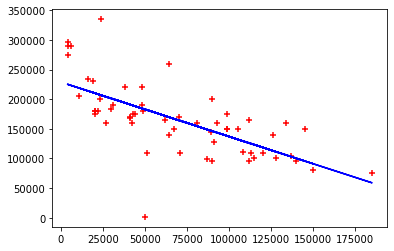

In [8]:
fig1, ax1 = plt.subplots()

ax1.ticklabel_format(style='plain')
ax1.scatter(A1.km,A1.price, color ='red', marker ='+')
ax1.plot(A1.km, reg.predict(A1[['km']]), color = 'blue')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

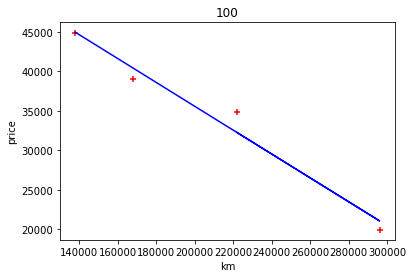

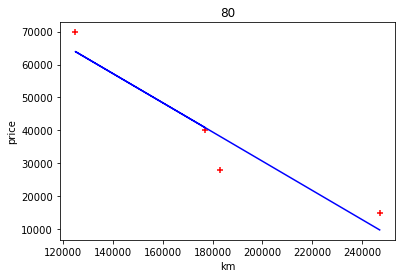

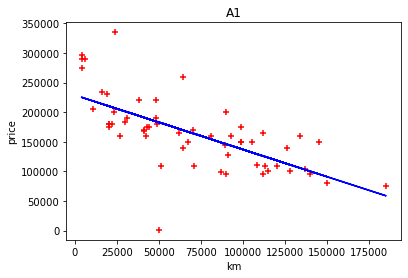

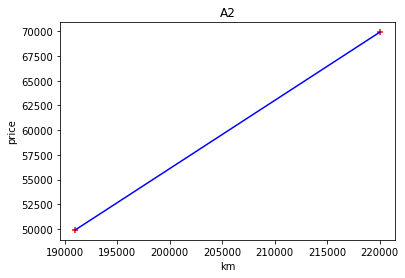

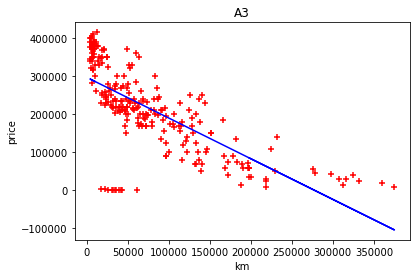

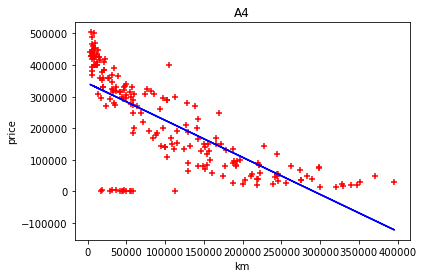

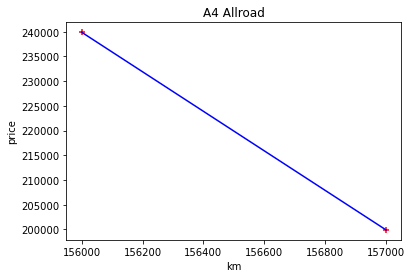

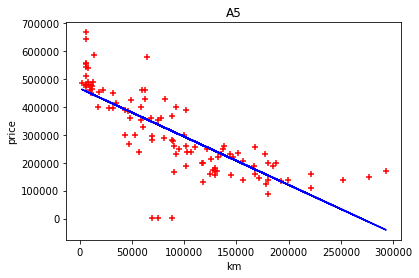

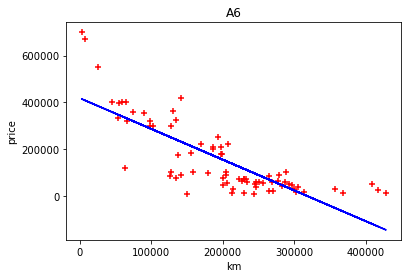

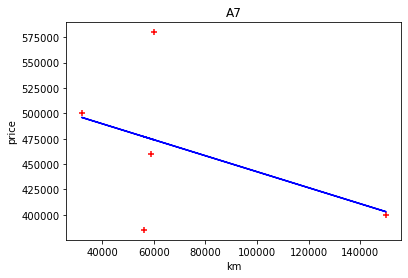

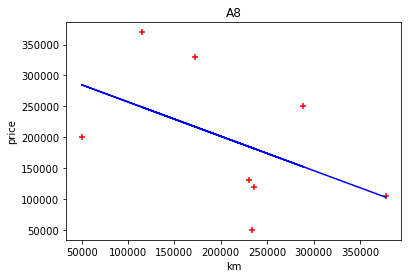

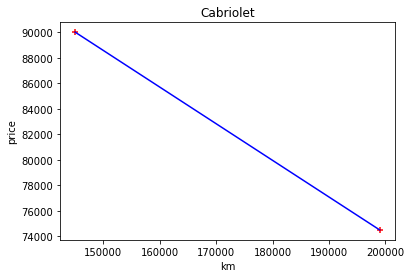

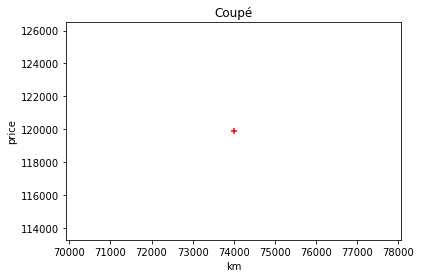

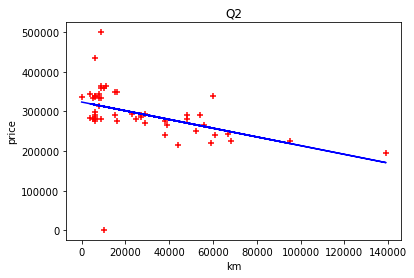

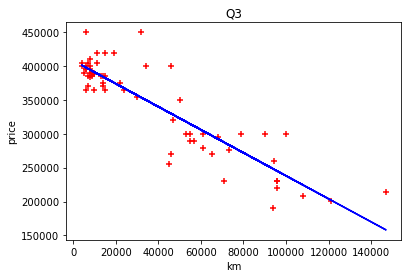

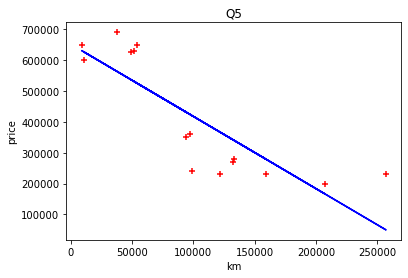

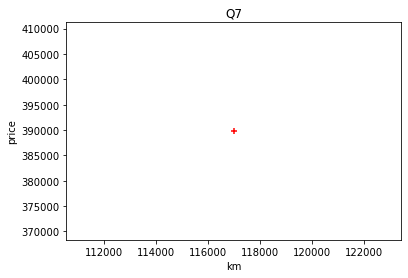

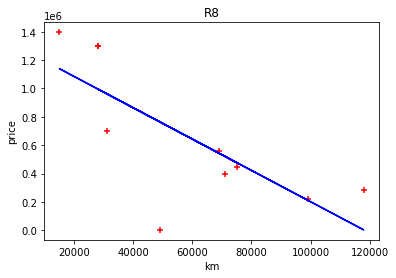

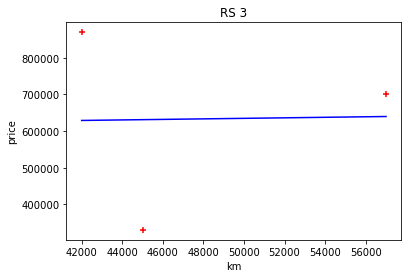

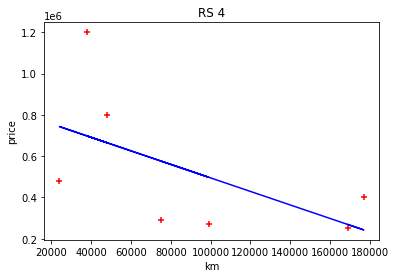

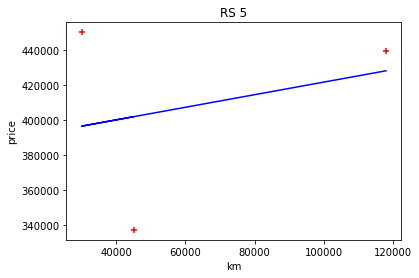

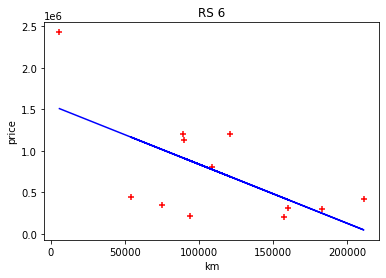

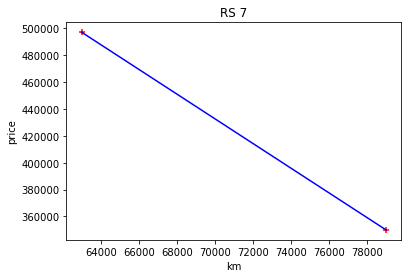

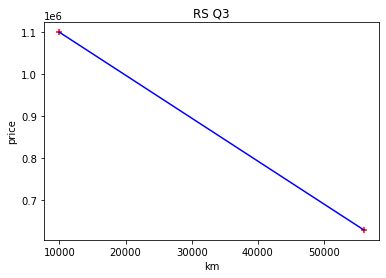

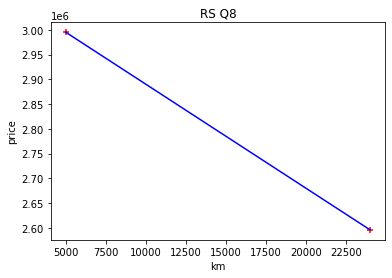

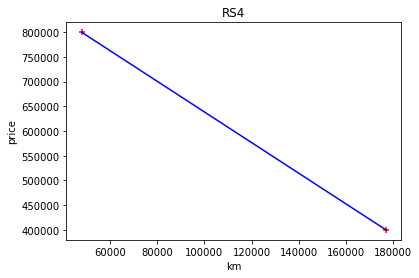

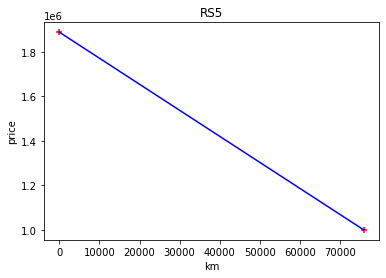

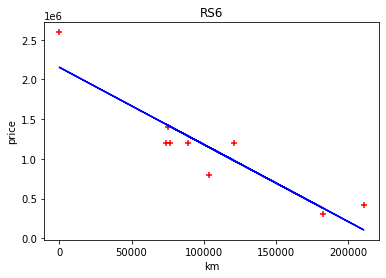

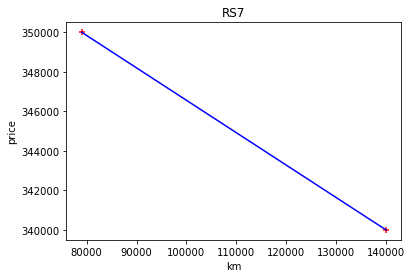

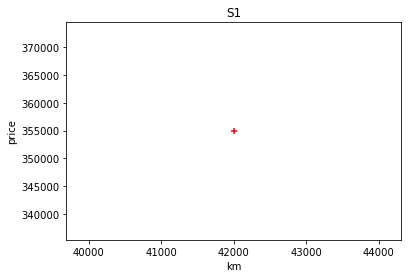

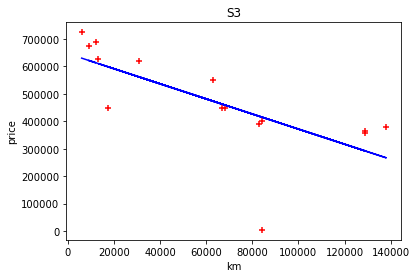

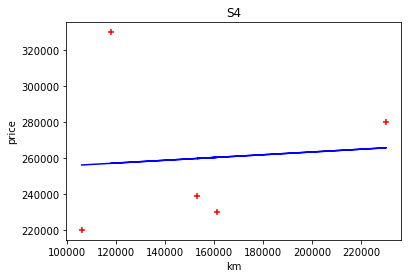

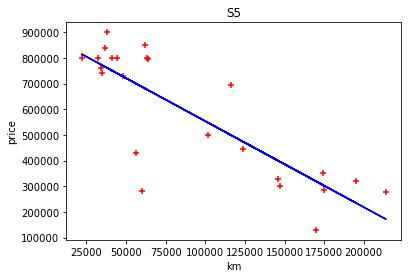

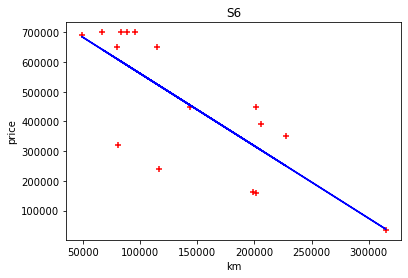

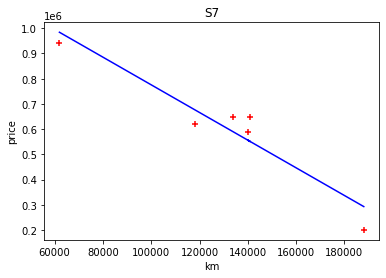

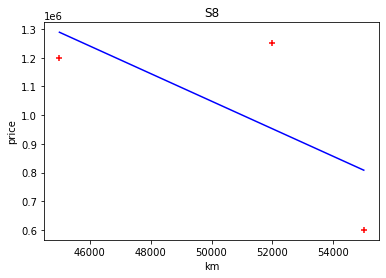

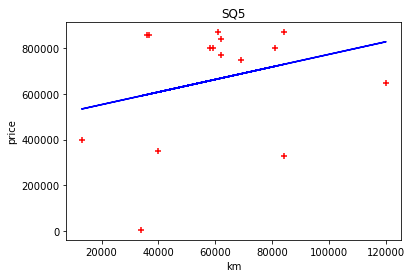

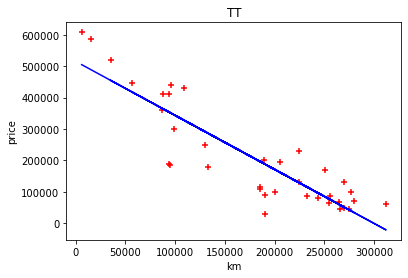

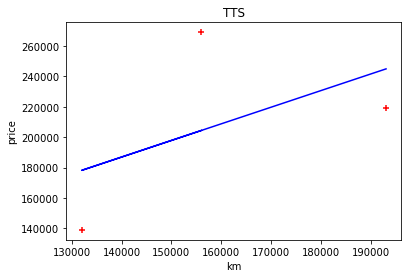

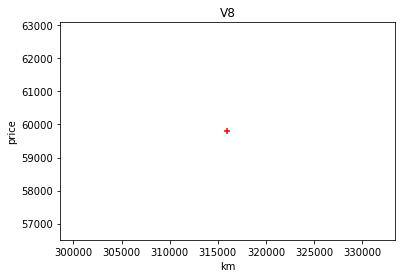

In [9]:
for m in models:
    plt.figure()
    Model = models.get(m)
    reg.fit(Model[['km']], Model.price)
    plt.title(m)
    plt.xlabel('km')
    plt.ylabel('price')
    plt.scatter(Model.km,Model.price, color ='red', marker ='+')
    plt.plot(Model.km, reg.predict(Model[['km']]), color = 'blue')
    


In [10]:
reg2 = linear_model.LinearRegression()

reg2.fit(A1[['km', 'year']], A1.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
reg2.intercept_

-21668068.605732143

In [12]:
reg2.predict(np.array([500000,2015]).reshape(1, 2))

array([29911.07288078])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


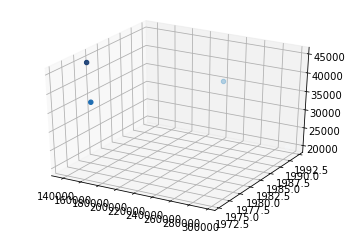

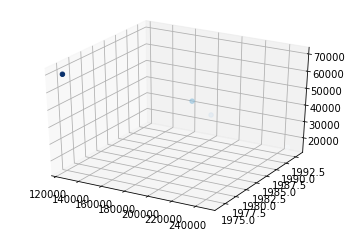

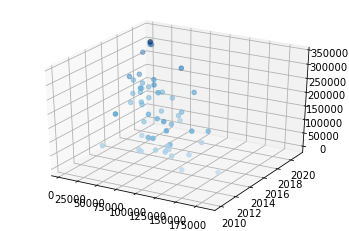

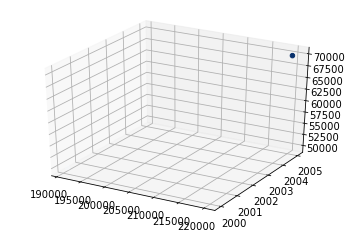

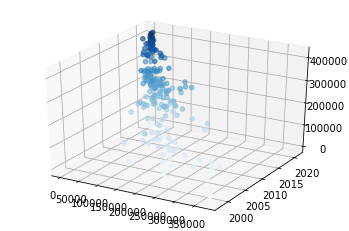

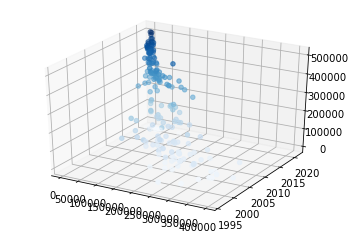

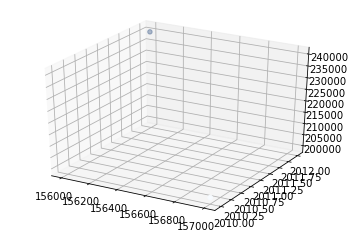

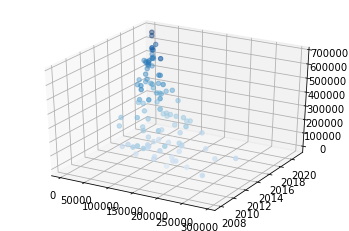

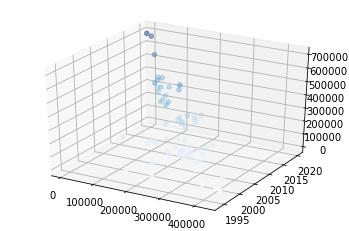

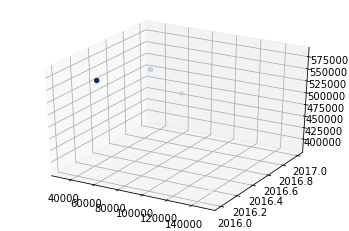

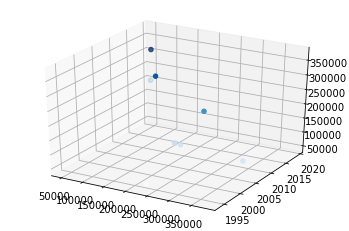

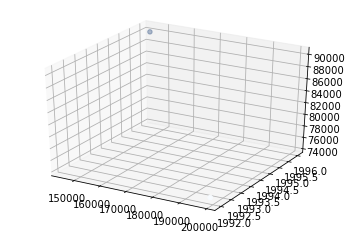

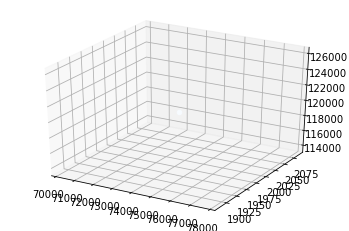

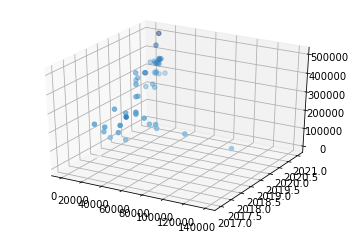

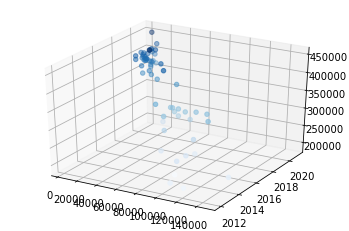

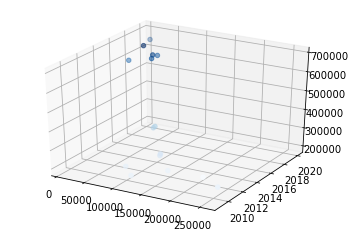

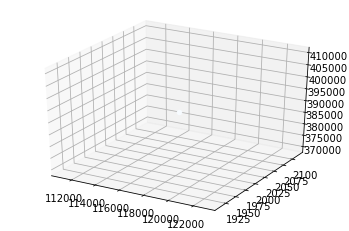

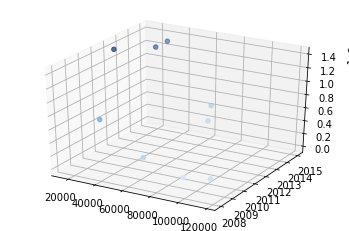

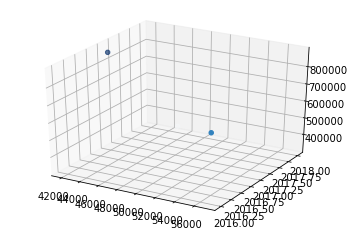

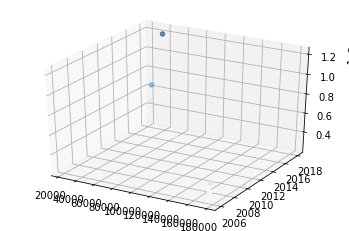

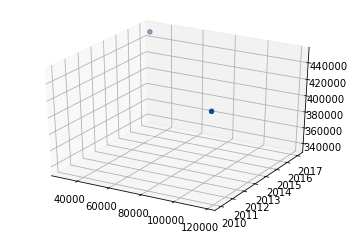

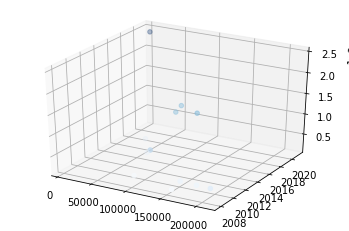

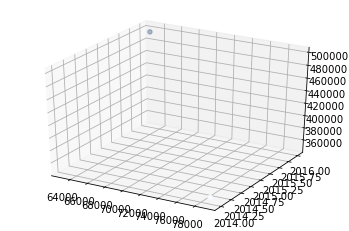

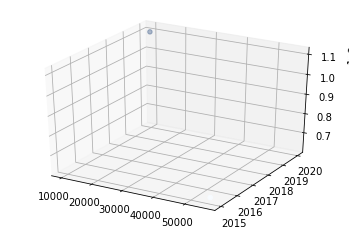

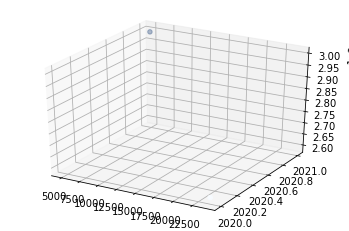

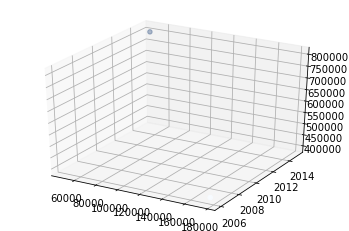

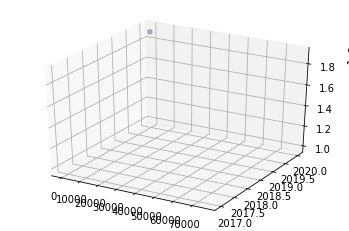

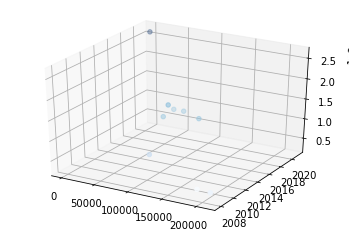

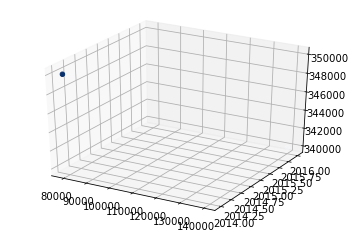

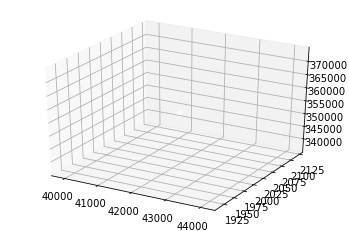

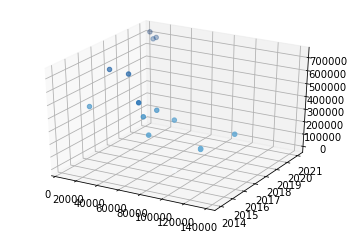

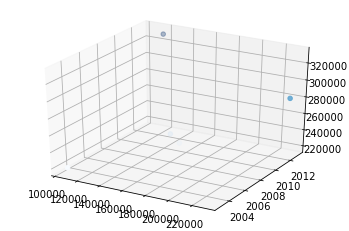

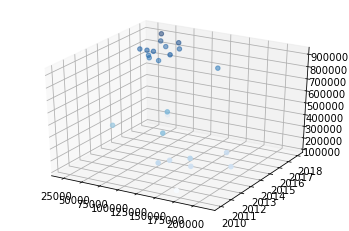

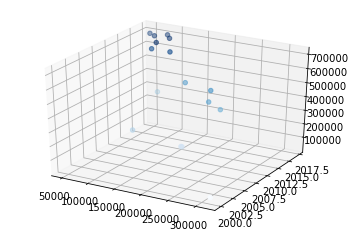

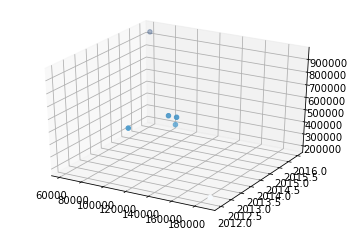

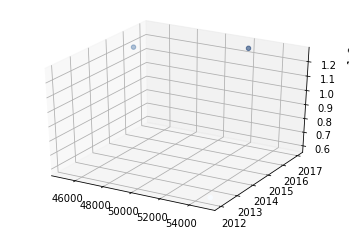

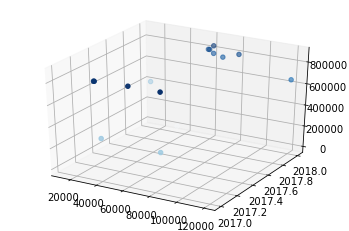

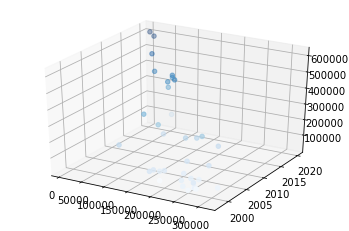

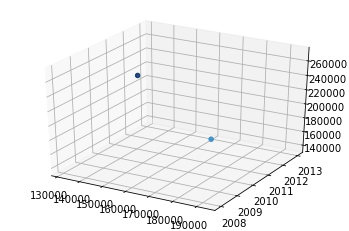

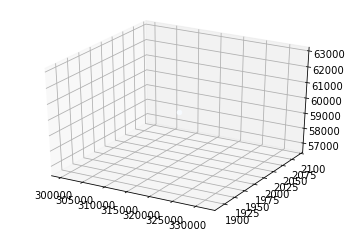

In [13]:
%matplotlib inline

for m in models:
    A1=models[m]
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(list(A1['km']),list(A1['year']),list(A1['price']), c=A1['price'], cmap="Blues")


{'Model': 'Audi A1', 'Coefficient': '-0.3601644135928655', 'Intercept': 162637.33298995887, 'Estimated_Price': '90604.45027138577 kr', 'model_id': None}


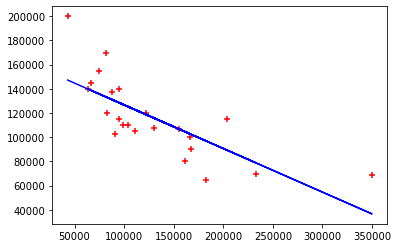

In [20]:
def estimate_price_1f(fuel, model, kms):
    basic_torvet = pd.read_csv("./data/torvet_" + fuel + ".csv", sep=";")
    basic_basen = pd.read_csv("./data/" + fuel + ".csv", sep=";")
    models = marge_and_split_by_model(basic_torvet,basic_basen, np)
    
    request_model = models[model]
    
    reg = linear_model.LinearRegression()
    reg.fit(request_model[['km']], request_model.price)
    
    reg.coef_
    reg.intercept_
    
    estimate = reg.predict(np.array([kms]).reshape(1, 1))
    
    coef = (str(reg.coef_[0]))
    
    estimate = str(estimate[0])
    final_estimate ={}
    
    final_estimate['Model'] = ("Audi " + model)
    final_estimate['Coefficient'] = (coef)
    final_estimate['Intercept'] = (reg.intercept_)
    final_estimate['Estimated_Price'] = (estimate + " kr")
    
    fig1, ax1 = plt.subplots()

    ax1.ticklabel_format(style='plain')
    ax1.scatter(request_model.km,request_model.price, color ='red', marker ='+')
    ax1.plot(request_model.km, reg.predict(request_model[['km']]), color = 'blue')
    commit_req(final_estimate)
    return final_estimate

Audi_A2 = estimate_price_1f("Diesel", "A1", 200000)


{'Model': 'Audi A1', 'Coefficient': '-0.20270251965688826, 8919.633741343443', 'Intercept': '-17819495.893736787', 'Estimated_Price': '52214.83524180576 kr', 'model_id': None}


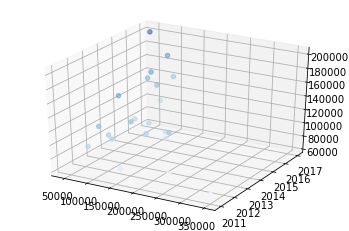

In [21]:
def estimate_price_2f(fuel, model, kms, year):
    basic_torvet = pd.read_csv("./data/torvet_" + fuel + ".csv", sep=";")
    basic_basen = pd.read_csv("./data/" + fuel + ".csv", sep=";")
    models = marge_and_split_by_model(basic_torvet,basic_basen, np)
    
    request_model = models[model]
    
    reg = linear_model.LinearRegression()
    reg.fit(request_model[['km','year']], request_model.price)
    
    reg.coef_
    reg.intercept_
    
    coef = (str(reg.coef_[0]) + ", " + str(reg.coef_[1]))
    estimate = reg.predict(np.array([kms,year]).reshape(1, 2))
    
    estimate = str(estimate[0])
    final_estimate ={}
    
    final_estimate['Model'] = ("Audi " + model)
    final_estimate['Coefficient'] = (coef)
    final_estimate['Intercept'] = (str(reg.intercept_))
    final_estimate['Estimated_Price'] = (estimate + " kr")
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(list(request_model['km']),list(request_model['year']),list(request_model['price']), c=request_model['price'], cmap="Blues")
    commit_req(final_estimate)
    return final_estimate

Audi_A1 = estimate_price_2f("Diesel", "A1", 500000,2015)

In [22]:
cnx = mysql.connect(host = "db", user = "root", passwd = "root", db = "db")
cursor = cnx.cursor()
query = 'select * from estimate_req'
cursor.execute(query)
print('TABLE COLUMNS: ',cursor.column_names,'\n')

myresult = cursor.fetchall()

for x in myresult:
    print(x)

TABLE COLUMNS:  ('model_id', 'Model', 'Coefficient', 'Intercept', 'Estimated_Price') 

(1, 'Audi A1', '-0.3601644135928655', '162637.33298995887', '90604.45027138577 kr')
(2, 'Audi A1', '-0.3601644135928655', '162637.33298995887', '90604.45027138577 kr')
(3, 'Audi A1', '-0.3601644135928655', '162637.33298995887', '90604.45027138577 kr')
(4, 'Audi A1', '-0.20270251965688826, 8919.633741343443', '-17819495.893736787', '52214.83524180576 kr')
